# <h1><center><div class="alert alert-block alert-success">Hotel Churn Project - Initial Data Exploration</div></center></h1><img align='right' width='120' height='150' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'> 
<a class="anchor" id="2nd-bullet">    </a>
## <font color='darkseagreen'> **Machine Learning Operations**</font>
##  Group K
- **José Ramirez Fernandes** - 20220641
- **Pedro Ferreira** - 20220589
- **Ricardo Montenegro Dona** - 20221359 
- **Adriana Monteiro** - 20220604
- **Quintino Fernandes** - 20220634

# Table of Contents

- [1. Metadata](#metadata)
- [2. Initial Treatment](#initial-treatment)
    - [2.1. Import Libraries](#import-libraries)
    - [2.2. Import dataset](#extract-data-and-join-datasets)
- [3. Data Exploration](#data-exploration)
    - [3.1. General Exploration](#general-exploration)
    - [3.2. Categorical Features](#categorical-features)
    - [3.3. Numerical Features](#numerical-features)
    - [3.4. Feature Analysis](#features-analysis)
        - [3.4.1. Is Canceled](#is-canceled)
        - [3.4.2. Agent](#agent)
        - [3.4.3. Average Daily Rate](#average-daily-rate)
        - [3.4.4. Company](#company)
        - [3.4.5. Country](#country)

# 1. Metadata<a class="anchor" id="metadata"></a>

- ADR: Average Daily Rate,
- Adults: Number of adults
- Agent: ID of the travel agency that made the booking
- ArrivalDateDayOfMonth: Day of the month of the arrival date
- ArrivalDateMonth: Month of arrival date with 12 categories: “January” to “December”
- ArrivalDateWeekNumber: Week number of the arrival date
- ArrivalDateYear: Year of the arrival date
- AssignedRoomType: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
- Babies: Number of babies
- BookingChanges: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- Children: Number of children
- Company: ID of the company/entity that made the booking or is responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- Country: Country of origin. Categories are represented in the ISO 3155-3:2013 format
- CustomerType: Type of booking, assuming one of four categories:
    - Contract - when the booking has an allotment or other type of contract associated to it;
    - Group – when the booking is associated to a group;
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
- DaysInWaitingList: Number of days the booking was in the waiting list before it was confirmed to the customer
- DepositType: Indication if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    - No Deposit – no deposit was made;
    - Non Refund – a deposit was made in the value of the total stay cost;
    - Refundable – a deposit was made with a value under the total cost of the stay.
- DistributionChannel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    - TA/TO
    - Corporate
    - Direct
    - GDS
    - Undefined 
- IsCanceled: Value indicating if the booking was:
    - canceled (1)
    - or not (0)
- IsRepeatedGuest: Value indicating if the booking name was from a
    - repeated guest (1)
    - or not (0)
- LeadTime: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- MarketSegment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    - Offline TA/TO
    - Online TA
    - Groups
    - Complementary
    - Direct
    - Corporate
    - Undefined
    - Aviation
- Meal: Type of meal booked. Categories are presented in standard hospitality meal packages:
    - Undefined/SC – no meal package;
    - BB – Bed & Breakfast;
    - HB – Half board (breakfast and one other meal – usually dinner);
    - FB – Full board (breakfast, lunch and dinner)
- PreviousBookingsNotCanceled: Number of previous bookings not cancelled by the customer prior to the current booking
- PreviousCancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
- RequiredCarParkingSpaces: Number of car parking spaces required by the customer
- ReservationStatus: Reservation last status, assuming one of three categories:
    - Canceled – booking was canceled by the customer;
    - Check-Out – customer has checked in but already departed;
    - No-Show – customer did not check-in and did inform the hotel of the reason why;
- ReservationStatusDate: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
- ReservationStatusDate: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
- ReservedRoomType: Code of room type reserved. Code is presented instead of designation for anonymity reasons
- StaysInWeekendNights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- StaysInWeekNights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- TotalOfSpecialRequests: Number of special requests made by the customer (e.g. twin bed or high floor)


# 2. Initial Setup<a class="anchor" id="initial-treatment"></a>

## 2.1. Import Libraries<a class="anchor" id="import-libraries"></a>

In [1]:
#General
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib
#!pip install folium
#!pip install plotly

In [2]:
# General
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('svg')
import matplotlib.pyplot as plt
import pkg_resources
import plotly.graph_objects as go
import datetime
import plotly.express as px
import folium

import warnings
warnings.filterwarnings('ignore')

# Define notebook color
pastel_colors = sns.color_palette("pastel")
sns.set_palette(pastel_colors)
%matplotlib inline

c:\Users\yugip\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
libraries = [
    'pandas',
    'numpy',
    'seaborn',
    'matplotlib',
    'datetime',
    'holidays',
    'plotly'
]


# Check Library Versions
for library in libraries:
    try:
        version = pkg_resources.get_distribution(library).version
        print(f"{library}: {version}")
    except pkg_resources.DistributionNotFound:
        print(f"{library}: Not installed")


pandas: 1.5.3
numpy: 1.22.2
seaborn: 0.11.2
matplotlib: 3.5.1
datetime: Not installed
holidays: 0.23
plotly: 5.14.1


## 2.2. Import Dataset <a class="anchor" id="extract-data-and-join-datasets"></a>

In [4]:
# Import dataset
df = pd.read_csv("Case4_H2.csv")

# 3. Data Exploration<a class="anchor" id="data-exploration"></a>

## 3.1. General Exploration<a class="anchor" id="general-exploration"></a>

In [5]:
df.T
#ADR: Average Daily Rate

,0,1,2,3,4,5,6,7,8,9,...,79320,79321,79322,79323,79324,79325,79326,79327,79328,79329
IsCanceled,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
LeadTime,6,88,65,92,100,79,3,63,62,62,...,44,188,135,164,21,23,102,34,109,205
ArrivalDateYear,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
ArrivalDateMonth,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
ArrivalDateWeekNumber,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
ArrivalDateDayOfMonth,1,1,1,1,2,2,2,2,2,2,...,31,31,30,31,30,30,31,31,31,29
StaysInWeekendNights,0,0,0,2,0,0,0,1,2,2,...,1,2,2,2,2,2,2,2,2,2
StaysInWeekNights,2,4,4,4,2,3,3,3,3,3,...,3,3,4,4,5,5,5,5,5,7
Adults,1,2,1,2,2,2,1,1,2,2,...,2,2,3,2,2,2,3,2,2,2
Children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.describe()
#We are observing a time frame between 2015 and 2017 according to arrival date

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [7]:
df.info()
#Checking and understanding the datetimes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [8]:
df.isnull().sum()
#Observing two variables with missing values with only a few values

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [9]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [10]:
# Remove unnecessary spaces from cells. Ex: instead of '       1' have '1'.
# Did it now because the x axis of the graphs below were not centered

df['AssignedRoomType'] = df['AssignedRoomType'].apply(lambda x: x[0])
df['ReservedRoomType'] = df['ReservedRoomType'].apply(lambda x: x[0])
df['Meal'] = df['Meal'].apply(lambda x: x[:2])
df['Agent'] = df['Agent'].apply(lambda x: x.strip()) 


## 3.2. Categorical Features<a class="anchor" id="categorical-features"></a>

In [11]:
# Define what are the categorical features
cat_cols = ['Agent', 'ArrivalDateMonth', 'AssignedRoomType', 'Company', 'Country', 'CustomerType',
            'DepositType', 'DistributionChannel', 'IsCanceled', 'IsRepeatedGuest', 'MarketSegment',
            'Meal', 'ReservationStatus', 'ReservationStatusDate', 'ReservedRoomType']

# Create a dataset with the categorical features only
cat_df = df[cat_cols]
cat_df.drop('IsCanceled', axis = 1, inplace = True)
cat_df.head()


,Agent,ArrivalDateMonth,AssignedRoomType,Company,Country,CustomerType,DepositType,DistributionChannel,IsRepeatedGuest,MarketSegment,Meal,ReservationStatus,ReservationStatusDate,ReservedRoomType
0,6,July,A,NULL,PRT,Transient,No Deposit,TA/TO,0,Offline TA/TO,HB,Check-Out,7/3/2015,A
1,9,July,A,NULL,PRT,Transient,No Deposit,TA/TO,0,Online TA,BB,Canceled,7/1/2015,A
2,9,July,A,NULL,PRT,Transient,No Deposit,TA/TO,0,Online TA,BB,Canceled,4/30/2015,A
3,9,July,A,NULL,PRT,Transient,No Deposit,TA/TO,0,Online TA,BB,Canceled,6/23/2015,A
4,9,July,A,NULL,PRT,Transient,No Deposit,TA/TO,0,Online TA,BB,Canceled,4/2/2015,A


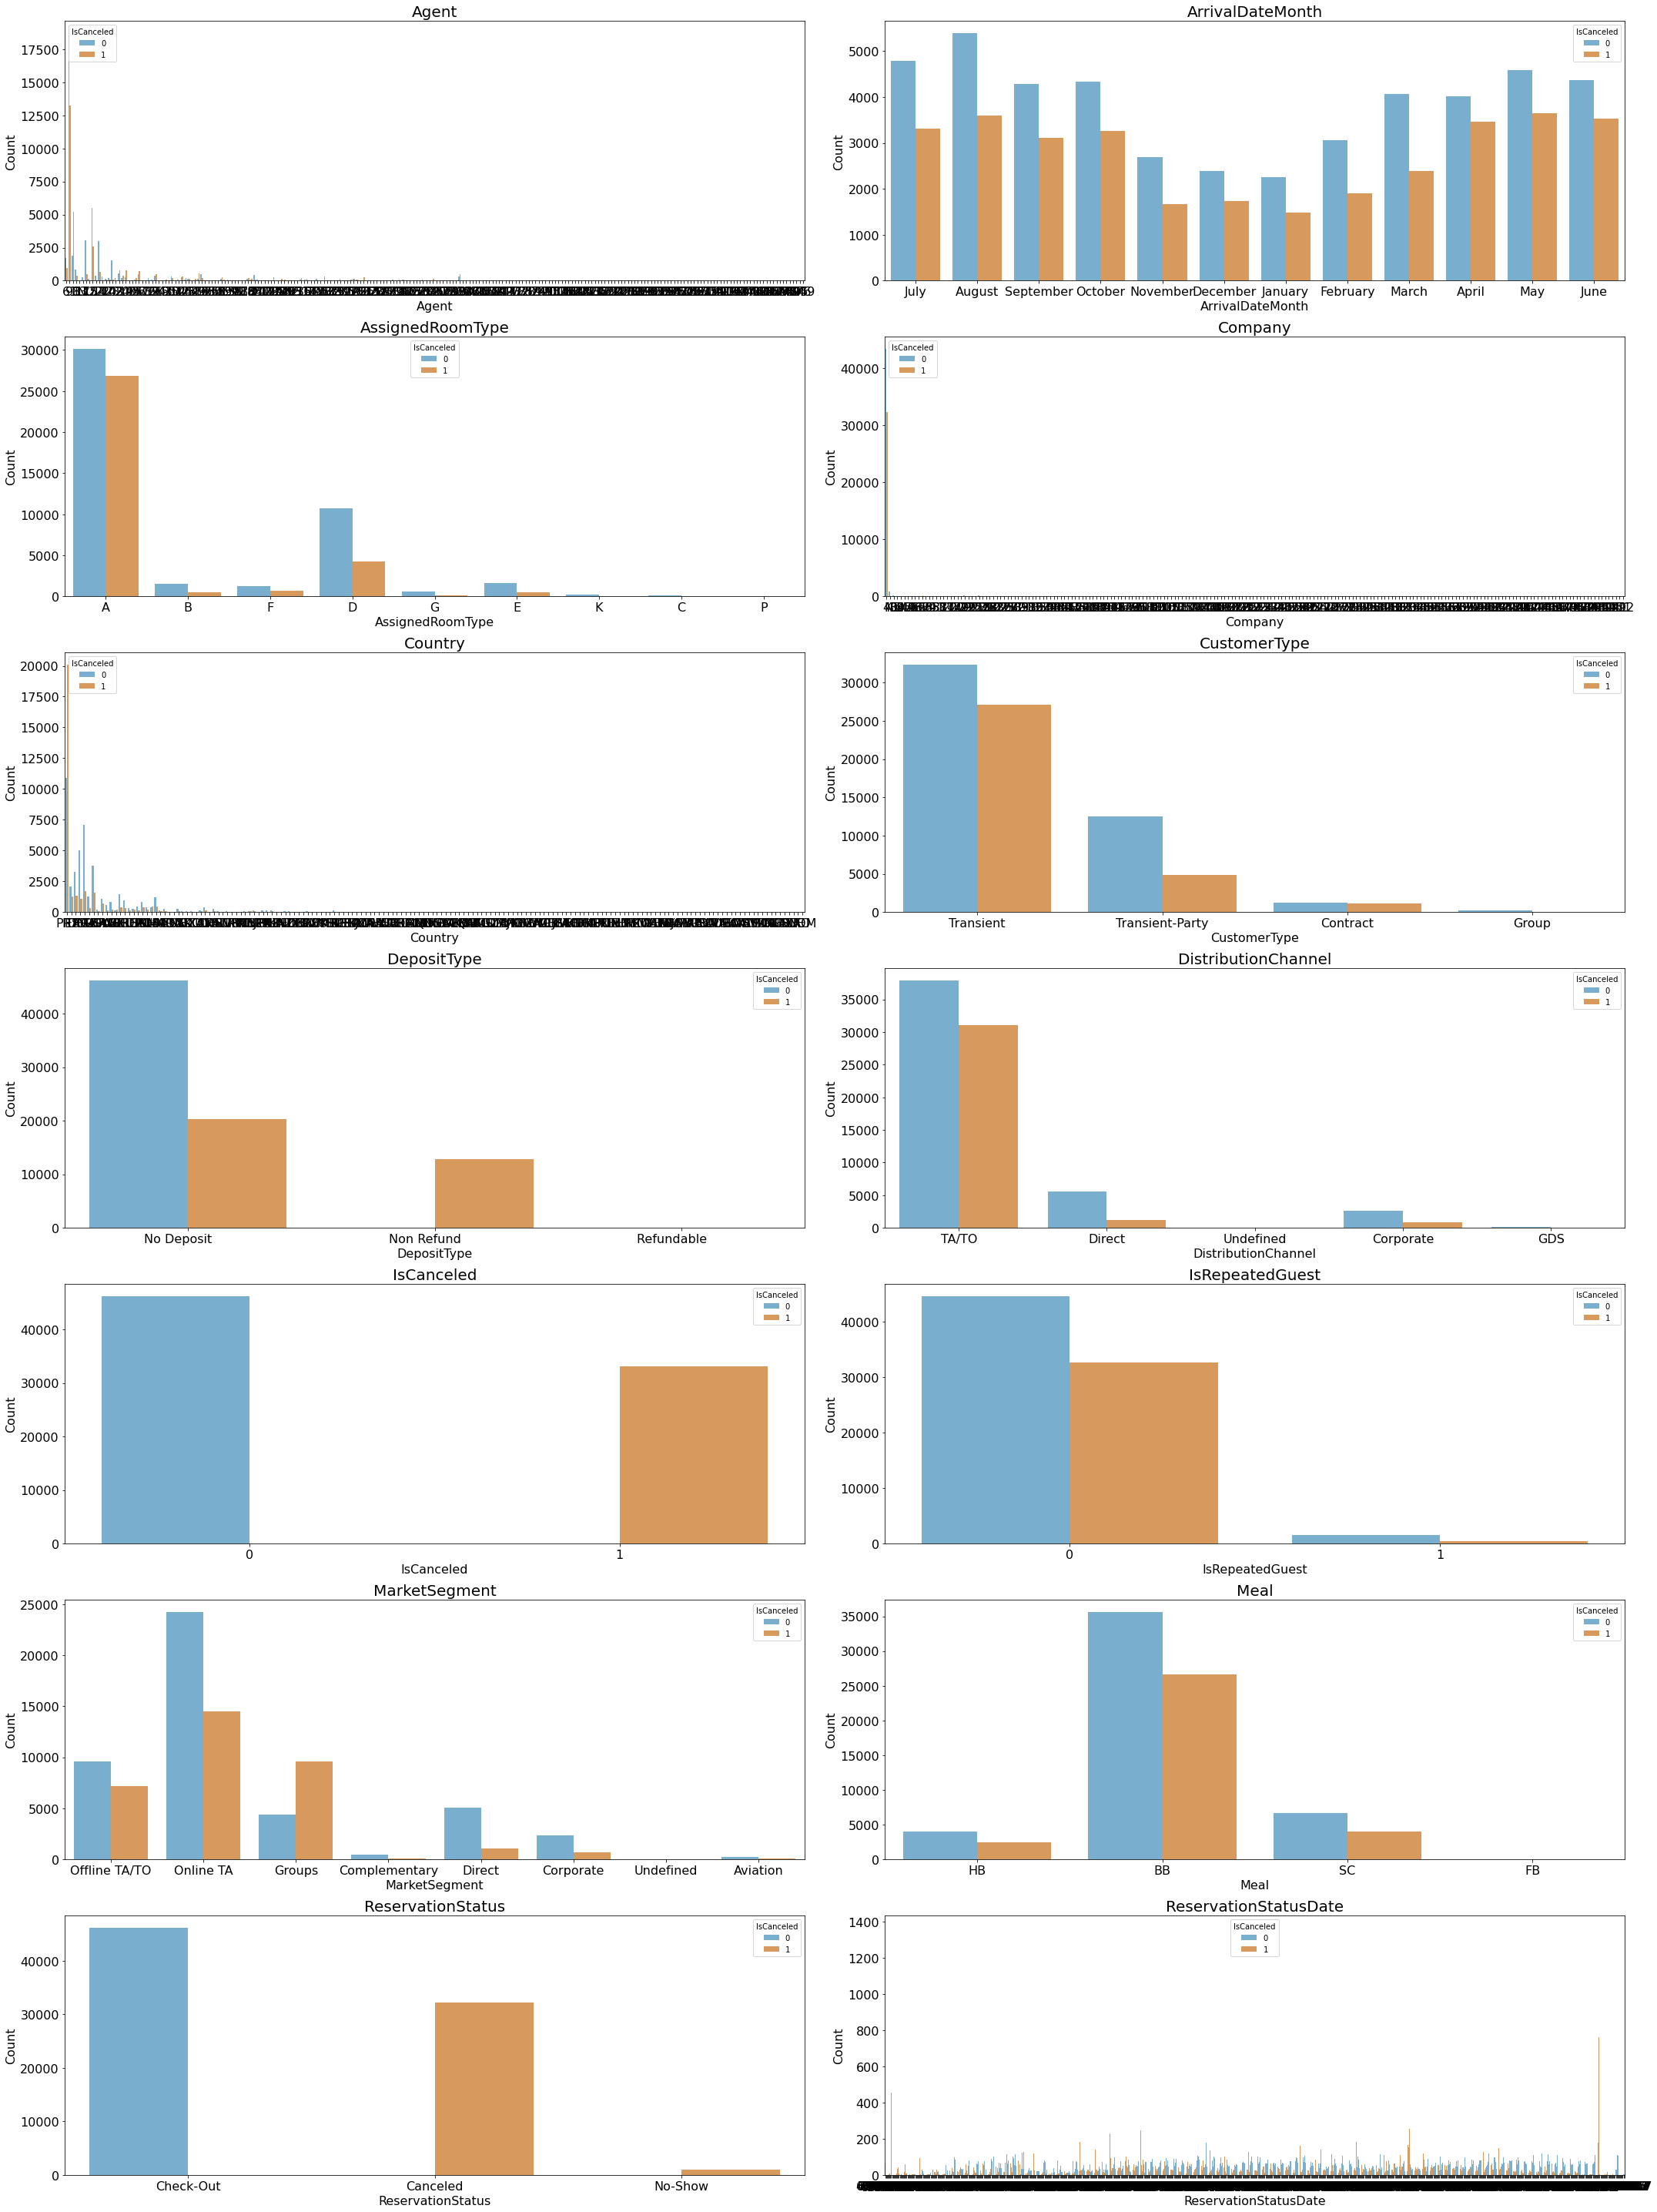

In [12]:
# Plot Categorical Features to analyse tendencies

fig, ax = plt.subplots(int(len(cat_cols)/2), 2, figsize=(30, 40))

for col, axis in zip(cat_cols, ax.flatten()):
    sns.countplot(df[col], ax=axis, hue=df['IsCanceled'], palette=['#6BB1DD', '#EB9A48'])
    axis.set_title(col, fontsize=20)  # Increase title font size
    axis.set_xlabel(col, fontsize=16)  # Increase x-axis label font size
    axis.set_ylabel('Count', fontsize=16)  # Increase y-axis label font size
    axis.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()

plt.show()


In [13]:
# As there are categorical features that are imbalanced we create a code that check if each category has observations
# regarding IsCanceled=1 and IsCanceled=0. Because Categories with only one option will bias the model.

result = [] 

cat_cols_filtered = [col for col in cat_cols if col != 'IsCanceled']  # Lista filtrada sem 'IsCanceled'

for col in cat_cols_filtered:
    cat_counts = df.groupby(col)['IsCanceled'].value_counts()
    filtered_cats = cat_counts.groupby(col).filter(lambda x: len(x) < 2) # every category that doesnt appear 0 and 1 in the groupby in the Iscanceled column
    cat_values = filtered_cats.index.get_level_values(col).unique().tolist()
    cat_values_stripped = [value.strip() for value in cat_values]
    
    result.append({
        'Variable': col,
        'Categories': cat_values_stripped
    })

# Df with the results. Ex: Agent 106, 107, 117.. and so on only have either Iscanceled=1 or Iscanceled=0
imbalanced_cat_result = pd.DataFrame(result)
imbalanced_cat_result

,Variable,Categories
0,Agent,"[106, 107, 112, 117, 122, 141, 144, 148, 150, ..."
1,ArrivalDateMonth,[]
2,AssignedRoomType,[P]
3,Company,"[100, 101, 105, 106, 108, 11, 110, 116, 122, 1..."
4,Country,"[ABW, AIA, AND, ASM, ATA, ATF, BEN, BFA, BOL, ..."
5,CustomerType,[]
6,DepositType,[]
7,DistributionChannel,[Undefined]
8,IsRepeatedGuest,[]
9,MarketSegment,[Undefined]


## 3.3. Numerical Features<a class="anchor" id="numerical-features"></a>

In [14]:
# Create a list with the numerical variables
num_cols = df.drop(cat_cols,axis=1).columns.to_list()

# Create a dataframe with the numerical variables only
num_df = df[num_cols]
num_df.head()


,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,6,2015,27,1,0,2,1,0.0,0,0,0,0,0,0.0,0,0
1,88,2015,27,1,0,4,2,0.0,0,0,0,0,0,76.5,0,1
2,65,2015,27,1,0,4,1,0.0,0,0,0,0,0,68.0,0,1
3,92,2015,27,1,2,4,2,0.0,0,0,0,0,0,76.5,0,2
4,100,2015,27,2,0,2,2,0.0,0,0,0,0,0,76.5,0,1


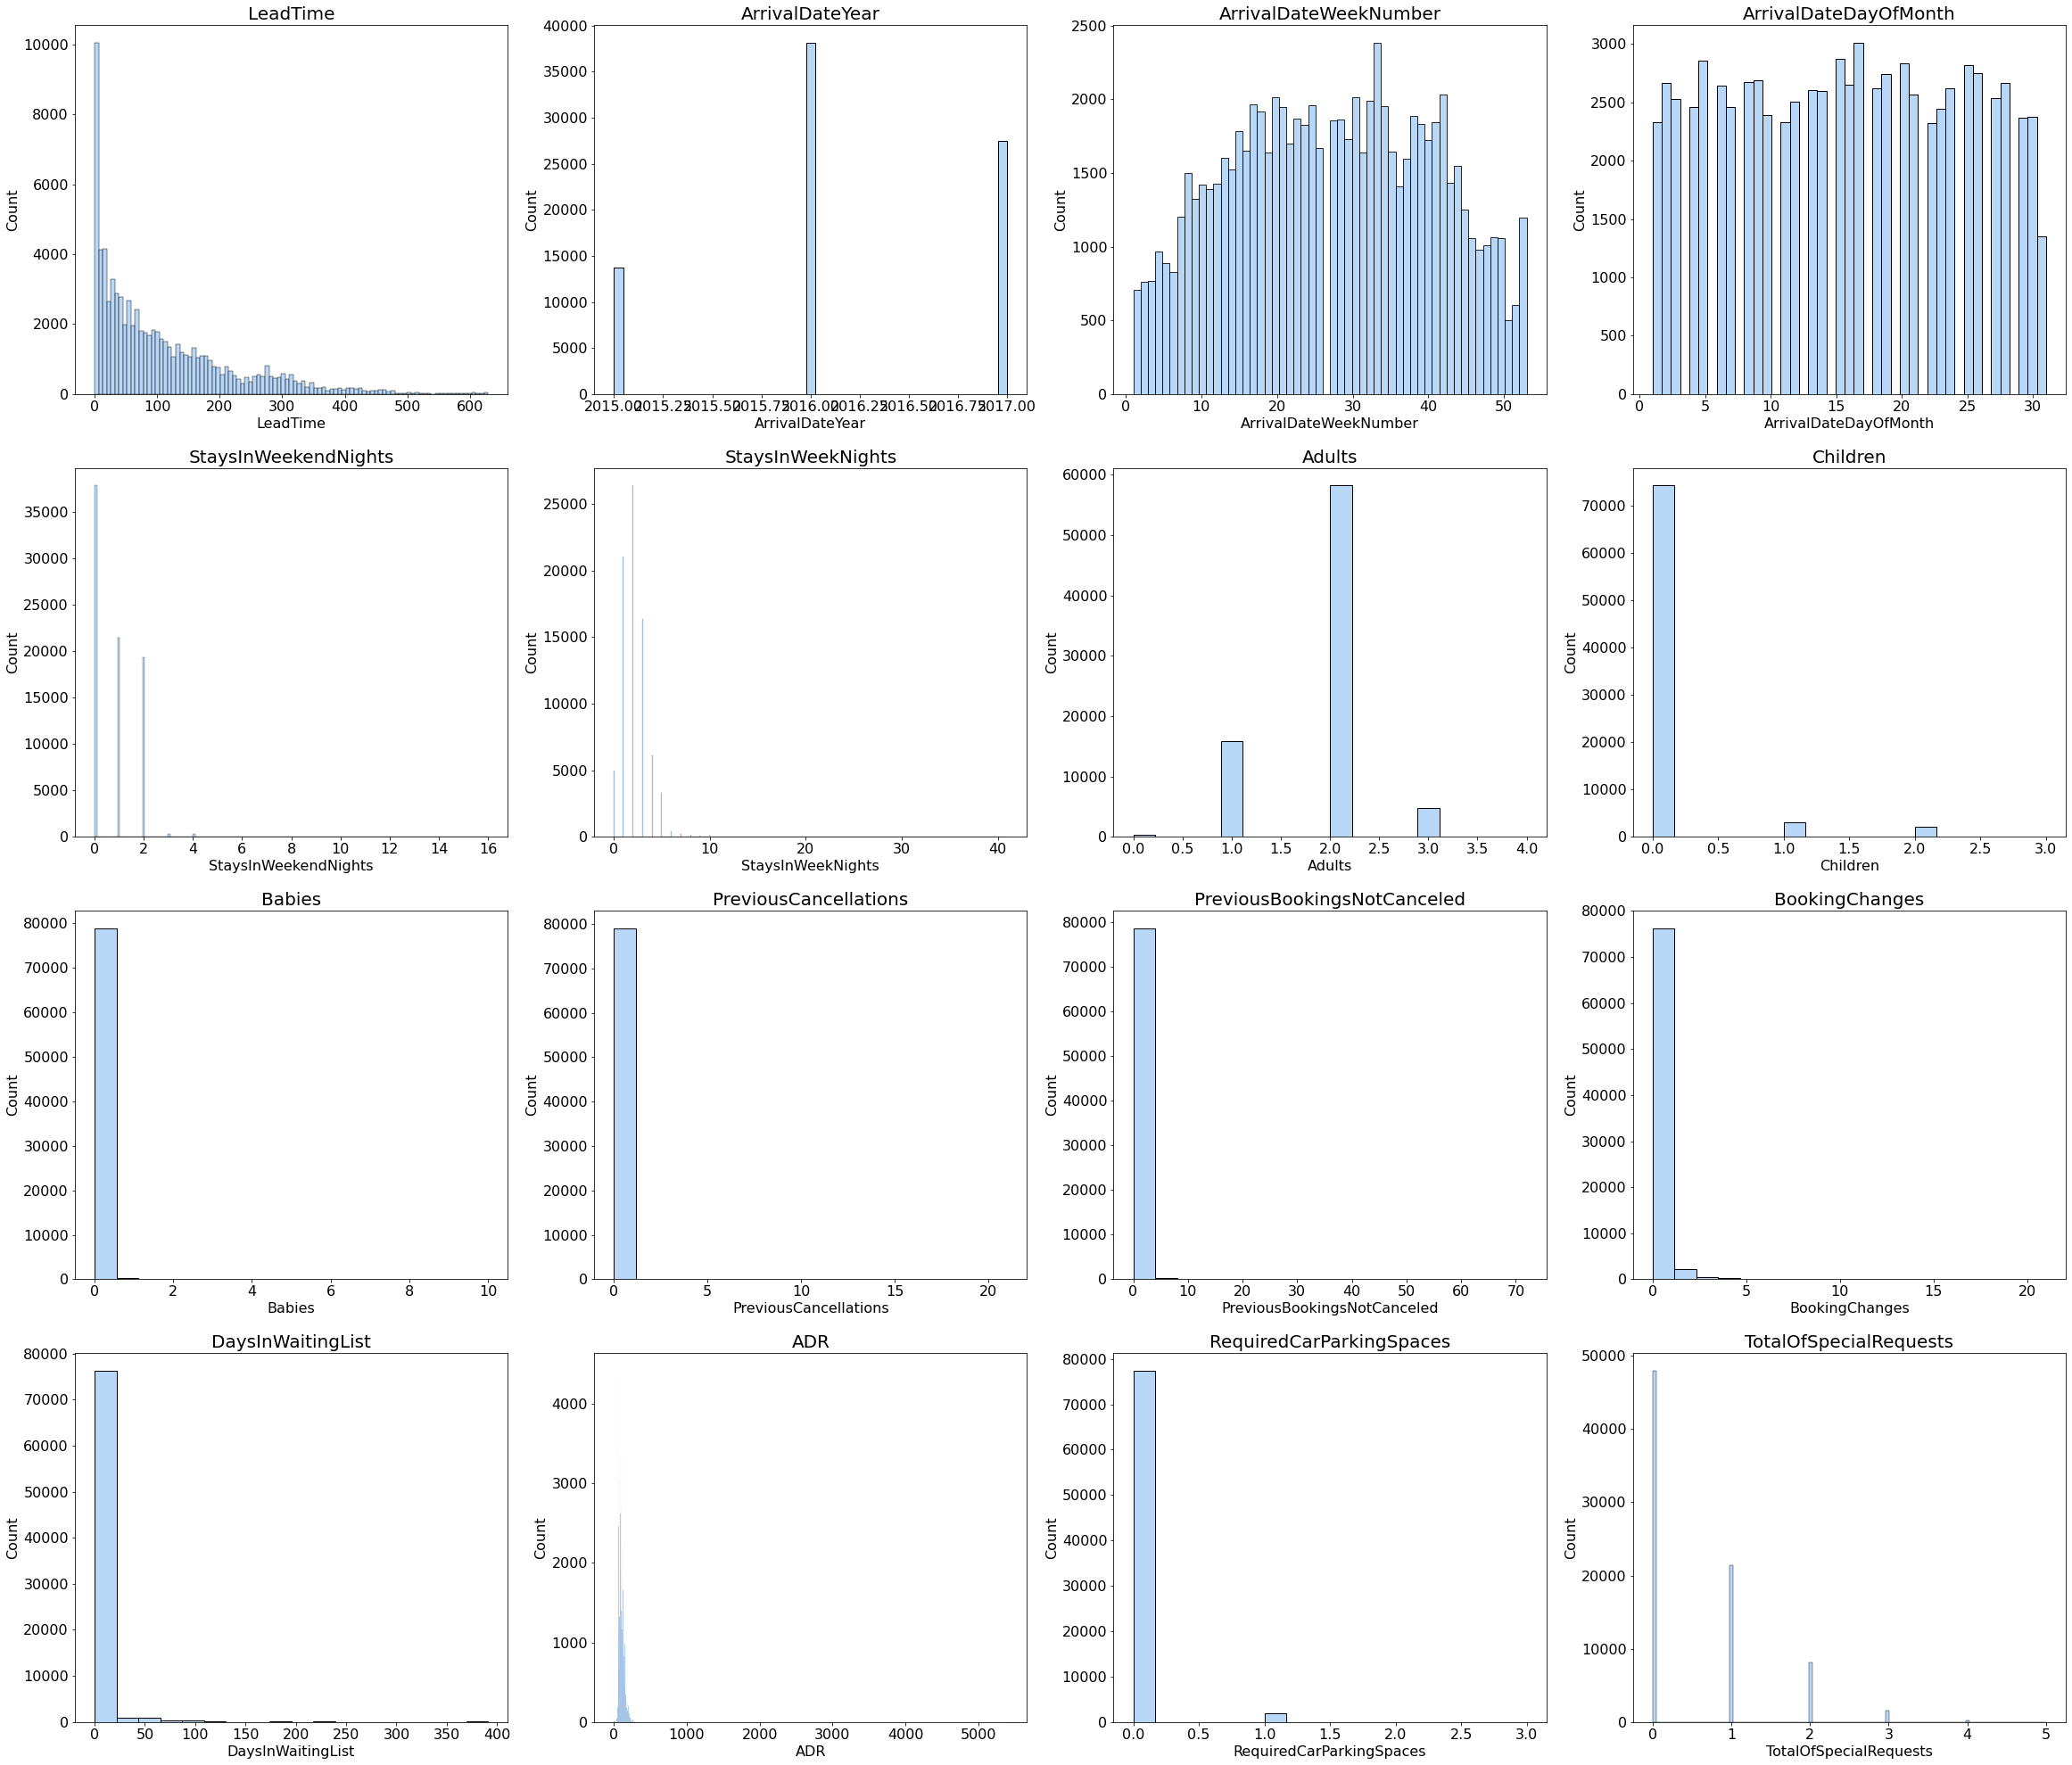

In [15]:
# Plot numerical variables to analysis tendencies
fig, ax = plt.subplots(int(len(num_cols)/4), 4, figsize=(40, 35))

for col, axis in zip(num_cols,ax.flatten()):
    sns.histplot(df[col], ax=axis)#, hue=df['IsCanceled'], palette=['#6BB1DD', '#EB9A48'])
    axis.set_title(col, fontsize=20)  # Increase title font size
    axis.set_xlabel(col, fontsize=16)  # Increase x-axis label font size
    axis.set_ylabel('Count', fontsize=16)  # Increase y-axis label font size
    axis.tick_params(axis='both', which='major', labelsize=16)

#plt.tight_layout()


plt.show()

In [16]:
df_num2 = df[num_cols].copy()
df_num2['IsCanceled'] = df['IsCanceled']
df_num2.groupby('IsCanceled').mean()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
IsCanceled,,,,,,,,,,,,,,,,
0,80.702734,2016.176062,27.159535,15.818616,0.800684,2.122934,1.828113,0.099896,0.007095,0.021156,0.208510,0.264364,2.150082,105.745948,0.041814,0.741088
1,150.281222,2016.171802,27.202465,15.741949,0.787505,2.266781,1.882907,0.079461,0.001933,0.161561,0.026041,0.079844,4.730409,104.687920,0.000000,0.275754


## 3.4. Features Analysis<a class="anchor" id="features-analysis"></a>

### 3.4.1 Is Canceled <a class="anchor" id="is-canceled"></a>

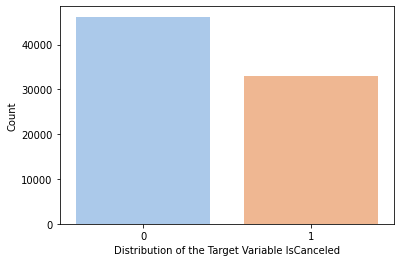

In [17]:
# Check the balance of the variable IsCanceled
sns.countplot(x='IsCanceled', data=df)
plt.xlabel('Distribution of the Target Variable IsCanceled')
plt.ylabel('Count')


plt.show()


### 3.4.2 Agent <a class="anchor" id="agent"></a>

In [18]:
# 131 values marked as NULL;
# According to Paper_HotelBookingDemandDatasets.pdf, this should not be
# considered a missing value, but rather as “not applicable”
df[df['Agent'].str.contains('NULL')]

df['Agent'] = df['Agent'].str.replace('NULL', 'N.A.')

In [19]:
df['Agent'].unique()

array(['6', '9', '1', '8', '13', '11', '7', '15', 'N.A.', '27', '14',
       '22', '17', '10', '28', '42', '3', '20', '19', '40', '45', '34',
       '37', '57', '61', '16', '39', '21', '24', '69', '41', '50', '30',
       '54', '52', '12', '44', '26', '64', '31', '29', '83', '32', '63',
       '66', '60', '55', '56', '89', '159', '155', '38', '91', '87',
       '118', '86', '134', '85', '94', '210', '214', '129', '179', '138',
       '174', '154', '170', '182', '153', '93', '151', '119', '35', '168',
       '2', '147', '195', '173', '58', '53', '128', '133', '79', '152',
       '235', '192', '5', '171', '191', '187', '236', '162', '215', '270',
       '157', '281', '177', '287', '240', '132', '331', '234', '98', '77',
       '103', '107', '262', '355', '220', '104', '330', '326', '121',
       '254', '205', '378', '23', '296', '290', '229', '390', '33', '286',
       '47', '276', '425', '315', '484', '323', '403', '219', '394',
       '509', '111', '423', '4', '71', '78', '72', '75', '

In [20]:
# 224 unique agents
len(df['Agent'].unique())

224

**Note**: Agents 24, 25, 36, 41, 47, 54, 55, 60, 61, 63, 64, 69, 70.....495.. only have one category of the variable is Canceled.

Check the table in the last cell of the Categorical Variables section.

E.g.: Agent 24 only have people that did not canceled. This is going to bias the algorithm.

### 3.4.3 Average Daily Rate <a class="anchor" id="average-daily-rate"></a>

In [21]:
# Define the desired order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical data type with the defined order
month_cat_type = pd.CategoricalDtype(categories=month_order, ordered=True)

# Apply the categorical data type to the 'ArrivalDateMonth' column
df['ArrivalDateMonth'] = df['ArrivalDateMonth'].astype(month_cat_type)

# Group the DataFrame by 'ArrivalDateMonth' and calculate the mean of 'ADR'
ADR_month = df.groupby('ArrivalDateMonth')['ADR'].mean().reset_index()

# Display the average price per night over the months
ADR_month

,ArrivalDateMonth,ADR
0,January,82.628986
1,February,85.088278
2,March,92.643116
3,April,111.251838
4,May,121.638560
5,June,119.074341
6,July,110.734292
7,August,114.680455
8,September,110.004661
9,October,99.974498


In [22]:
#Variation of price per night over the months

# Create the interactive line chart
line_chart = px.line(ADR_month, x='ArrivalDateMonth', y='ADR', title='Variation of Price per Night over Months')

# Customize the line color and background color
line_chart.update_traces(line=dict(color='#6BB1DD'))
line_chart.update_layout(plot_bgcolor='#E6F5FF')

# Center-align the title
line_chart.update_layout(title={'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'})


# Show the line chart
line_chart.show()

In [23]:
#Which months have more Bookings

bookings_month = df['ArrivalDateMonth'].value_counts().reset_index()
bookings_month.columns = ['Month', 'Number of Bookings']

# Apply the categorical data type to the 'Month' column
bookings_month['Month'] = bookings_month['Month'].astype(month_cat_type)

# Sort the DataFrame by the categorical column
bookings_month = bookings_month.sort_values('Month')
bookings_month


,Month,Number of Bookings
11,January,3736
8,February,4965
7,March,6458
5,April,7480
1,May,8232
3,June,7894
2,July,8088
0,August,8983
6,September,7400
4,October,7605


In [24]:
#Which months have more guests

# Create the interactive line chart
line_chart = px.line(bookings_month, x='Month', y='Number of Bookings', title='Total Number of Bookings per Month')

# Customize the line color and background color
line_chart.update_traces(line=dict(color='#6BB1DD'))
line_chart.update_layout(plot_bgcolor='#E6F5FF')

# Center-align the title
line_chart.update_layout(title={'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'})


# Show the line chart
line_chart.show()

### 3.4.4 Company <a class="anchor" id="company"></a>

In [25]:
# How many companies in the dataset
len(df['Company'].unique())

208

In [26]:
#Only one third of the companies are registered, others are NULL.
#According to Paper_HotelBookingDemandDatasets.pdf, this should not be
#considered a missing value, but rather as “not applicable”
df[df['Company'].str.contains('NULL')].head()

df['Company'] = df['Company'].str.replace('NULL', 'N.A.')

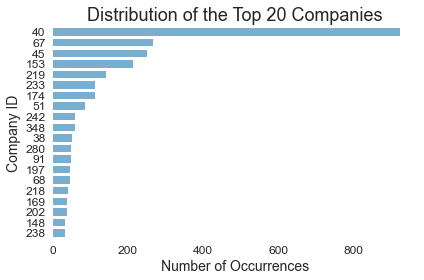

In [27]:
# Filter the DataFrame to exclude rows with 'N.A' in the 'Company' column
company_df = df[~df['Company'].str.contains('N.A')]

# Group the DataFrame by 'Company' and count the number of occurrences
company_counts = company_df.groupby('Company').size().reset_index(name='Count')

# Get the top 20 companies by count and plot their distribution
top_companies = company_counts.nlargest(20, 'Count')

# Set the style of the plot to white
sns.set_style("white")

# Create a bar plot using seaborn (sns) library, specifying the x-axis as 'Count', y-axis as 'Company',
#  and the data as 'top_companies'.
sns.barplot(x='Count', y='Company', data=top_companies, color='#6BB1DD')

# Add a title to the plot
plt.title('Distribution of the Top 20 Companies', fontsize=18)

# Add labels to the x-axis and y-axis
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Company ID', fontsize=14)

# Set the font size of x-axis and y-axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the left and bottom spines of the plot
sns.despine(left=True, bottom=True)

# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()


# Display the plot
plt.show()

In [28]:
# More than 70 000 observations are NaN
df.groupby('Company')['IsCanceled'].value_counts()

Company      IsCanceled
       N.A.  0             43323
             1             32318
100          0                 1
101          0                 1
105          0                 8
                           ...  
91           0                44
             1                 4
93           0                 2
             1                 1
96           0                 1
Name: IsCanceled, Length: 266, dtype: int64

In [29]:
company_counts = df.groupby('Company')['IsCanceled'].value_counts()
company_counts.to_csv('company_counts.txt', header=True)

**Note** : 75 000 of the dataset did not come with a company. 

The varible Company is, like the variable Agent, very imbalanced regarding cancelations and no cancelations

Summing up it is going to bias the model, and it does not have dimension to be usefull.

### 3.4.5 Country <a class="anchor" id="country"></a>

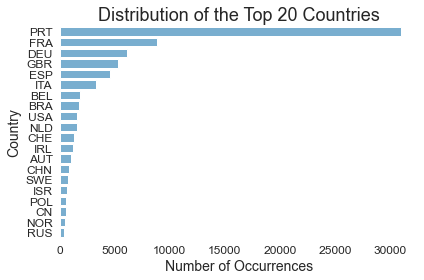

In [30]:
# Group the DataFrame by 'Company' and count the number of occurrences
country_counts = df.groupby('Country').size().reset_index(name='Count')

# Get the top 20 countries by count and plot their distribution
top_companies = country_counts.nlargest(20, 'Count')
sns.set_style("white")

sns.barplot(x='Count', y='Country', data=top_companies, color='#6BB1DD')
plt.title('Distribution of the Top 20 Countries', fontsize=18)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()


plt.show()

In [31]:
# Number of Countries in the dataset
len(df['Country'].unique())

167

In [32]:
#code taken from Kaggle: https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc/notebook

df_not_canceled_countries = df[df['IsCanceled'] == 0]['Country'].value_counts().reset_index()
df_not_canceled_countries.columns = ['Country', 'Number of Booking Not Canceled']

df_canceled_countries = df[df['IsCanceled'] == 1]['Country'].value_counts().reset_index()
df_canceled_countries.columns = ['Country', 'Number of Booking Canceled']


In [33]:
df_not_canceled_countries

,Country,Number of Booking Not Canceled
0,PRT,10879
1,FRA,7081
2,DEU,5012
3,GBR,3753
4,ESP,3285
...,...,...
145,GUY,1
146,UGA,1
147,PYF,1
148,SYC,1


In [34]:
df_canceled_countries

,Country,Number of Booking Canceled
0,PRT,20081
1,FRA,1723
2,GBR,1562
3,ESP,1326
4,ITA,1253
...,...,...
120,UMI,1
121,NIC,1
122,ZMB,1
123,CRI,1


In [35]:
#Create the base map using Folium
basemap = folium.Map()

#Create the choropleth map using Plotly Express
cancelation_map = px.choropleth(df_canceled_countries, locations='Country',
                           color='Number of Booking Canceled', hover_name='Country',
                           color_continuous_scale='Blues',  # Set color scale to blue-ish tones
                           labels={'Number of Booking Canceled': 'Number of Booking Canceled'})  # Specify label for color scale

#Set the title of the choropleth map
cancelation_map.update_layout(
    title_text='Bookings Canceled by Country',
    title_x=0.5  # Center the title
)


#Convert the Plotly figure to HTML and add it to the Folium map
folium_static_html = cancelation_map.to_html(full_html=False)
folium.IFrame(html=folium_static_html, width=100, height=50).add_to(basemap)

#Display the map
cancelation_map

In [36]:
#Create the base map using Folium
basemap = folium.Map()

#Create the choropleth map using Plotly Express
stays_map = px.choropleth(df_not_canceled_countries, locations='Country',
                           color='Number of Booking Not Canceled', hover_name='Country',
                           color_continuous_scale='Blues',  # Set color scale to blue-ish tones
                           labels={'Number of Booking Not Canceled': 'Number of Booking Not Canceled'})  # Specify label for color scale

#Set the title of the choropleth map
stays_map.update_layout(
    title_text='Booking Not Canceled by Country',
    title_x=0.5  # Center the title
)


#Convert the Plotly figure to HTML and add it to the Folium map
folium_static_html = stays_map.to_html(full_html=False)
folium.IFrame(html=folium_static_html, width=100, height=50).add_to(basemap)

#Display the map
stays_map

In [37]:
# 83% of the observations belongs to the top 10 countries, meaning other countries are almost insignificant

number_top_countries = df[(df['Country']=='PRT') | (df['Country']=='FRA')| (df['Country']=='DEU') 
                     | (df['Country']=='GBR') | (df['Country']=='ESP') 
                     | (df['Country']=='ITA') | (df['Country']=='BEL') 
                     | (df['Country']=='BRA')| (df['Country']=='USA')
                     | (df['Country']=='NLD')].shape[0]

print('{}% of the database are customers from the 10 most present countries'.format(int((number_top_countries/df.shape[0])*100)))

83% of the database are customers from the 10 most present countries


### 3.4.6. Days in Waiting List <a class="anchor" id="waiting-list"></a>

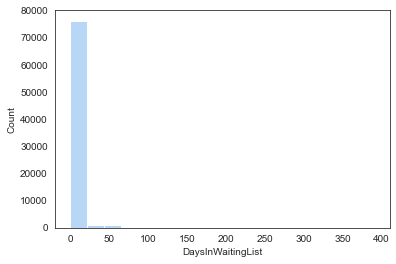

In [38]:
# Check Distribution of Days in waiting List
sns.histplot(data=df, x=df['DaysInWaitingList'])

plt.show()

In [39]:
# Majority of the clients are 0 days in waiting list
df['DaysInWaitingList'].value_counts()

0      75887
39       226
58       164
44       140
31       127
       ...  
113        1
193        1
100        1
89         1
36         1
Name: DaysInWaitingList, Length: 115, dtype: int64

<AxesSubplot:xlabel='IsCanceled', ylabel='DaysInWaitingList'>

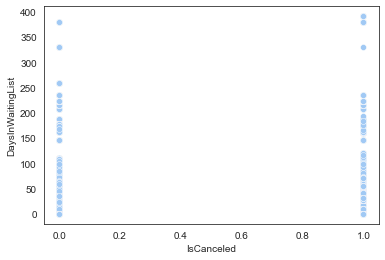

In [40]:
# The days someone is in waiting list is not related with someone who Canceled
sns.scatterplot(data=df, y='DaysInWaitingList', x='IsCanceled')

**Note** : 
This scatterplot shows that there were people that Canceled and didn't cancel independently of the time in the waiting list.

Summing up, it is possibly a variable with low importance.

### 3.4.7. Market Segment <a class="anchor" id="market-segment"></a>

In [41]:
#The categories are not balanced regarding cancellations, but there are cases of both situations

df.groupby('MarketSegment')['IsCanceled'].value_counts()

MarketSegment  IsCanceled
Aviation       0               185
               1                52
Complementary  0               478
               1                64
Corporate      0              2345
               1               641
Direct         0              5037
               1              1056
Groups         1              9623
               0              4352
Offline TA/TO  0              9574
               1              7173
Online TA      0             24257
               1             14491
Undefined      1                 2
Name: IsCanceled, dtype: int64

### 3.4.8. Distribution Channel <a class="anchor" id="distribution-channel"></a>

In [42]:
#The categories are not balanced regarding cancellations, but there are cases of both situations 

df.groupby('DistributionChannel')['IsCanceled'].value_counts()

DistributionChannel  IsCanceled
Corporate            0              2622
                     1               786
Direct               0              5548
                     1              1232
GDS                  0               156
                     1                37
TA/TO                0             37902
                     1             31043
Undefined            1                 4
Name: IsCanceled, dtype: int64

### 3.4.9. Customer Type <a class="anchor" id="customer-type"></a>

In [43]:
# Categories are not perfectly balanced but they are acceptable
df.groupby('CustomerType')['IsCanceled'].value_counts()

CustomerType     IsCanceled
Contract         0              1195
                 1              1105
Group            0               264
                 1                29
Transient        0             32306
                 1             27098
Transient-Party  0             12463
                 1              4870
Name: IsCanceled, dtype: int64